In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Coffee Shop Sales.xlsx")

# data cleaning

In [3]:
data.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [77]:
data['month']=data['transaction_date'].dt.month_name(locale='English')
data['day'] = data["transaction_date"].dt.day_name(locale = "english")

In [78]:
data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,hours,total_price,Size,day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia,January,7,6.00,Ragular,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai,January,7,6.20,Large,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate,January,7,9.00,Large,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend,January,7,2.00,Small,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai,January,7,6.20,Large,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint,June,20,5.00,Ragular,Friday
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast,June,20,6.00,Large,Friday
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint,June,20,3.00,Large,Friday
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,June,20,3.75,medium,Friday


In [7]:
data['transaction_time']= data['transaction_time'].astype(str)
#data['hours'] = data['transaction_time'].str.split().str[0]

In [8]:
data['hours'] = data['transaction_time'].str.split(":").str[0]

In [9]:
data['hours']  =data['hours'].astype(int) 

In [10]:
data['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [11]:
data["product_type"].unique() 

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [12]:
'''def extract_type(p_type):
    if "tea" in p_type:
        return "tea"
data["product_type"] = data["product_type"].apply(extract_type)    ''' 

'def extract_type(p_type):\n    if "tea" in p_type:\n        return "tea"\ndata["product_type"] = data["product_type"].apply(extract_type)    '

In [13]:
data


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,hours
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,June,20
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,June,20
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,June,20
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,June,20


In [14]:
data["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [15]:
data['total_price'] = data['transaction_qty'] * data['unit_price']

In [16]:
max(data['product_detail'].unique())

'Traditional Blend Chai Rg'

In [17]:
def extract_detail(detail):
    if "Rg" in detail:
        return "Ragular"
    if "Sm" in detail:
        return "Small"
    if "Lg" in detail:
        return "Large"
    else:
        return "medium"
data['Size'] = data['product_detail'].apply(extract_detail)        
        

In [18]:
def extract_detail(detail):
    if isinstance(detail,str):
        for size in [" Rg"," Lg"," Sm"]:
            detail = detail.replace(size,"")
    return detail
data['product_detail'] = data['product_detail'].apply(extract_detail) 

In [19]:
data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,hours,total_price,Size
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia,January,7,6.00,Ragular
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai,January,7,6.20,Large
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate,January,7,9.00,Large
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend,January,7,2.00,Small
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai,January,7,6.20,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint,June,20,5.00,Ragular
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast,June,20,6.00,Large
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint,June,20,3.00,Large
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,June,20,3.75,medium


# remove unwvanted space

In [20]:
data["product_detail"] = data["product_detail"].str.strip()

# oure data is clean an now visulization processed by only matplotlib libaray

In [21]:
import seaborn as sns

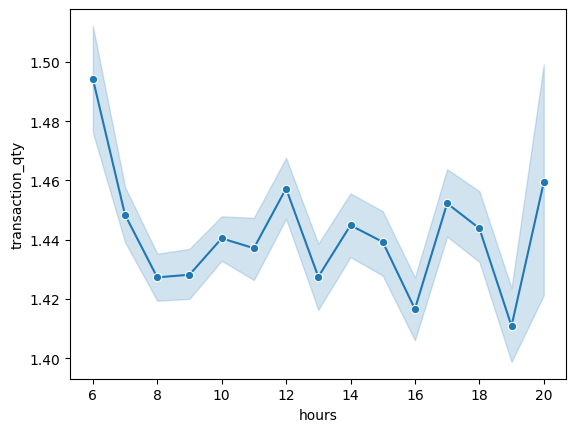

In [22]:
sns.lineplot(x = "hours" ,y = "transaction_qty", data = data,marker = "o")
plt.show()

In [23]:
df=data.groupby("product_category")['total_price'].sum()

In [24]:
df

product_category
Bakery                 82315.64
Branded                13607.00
Coffee                269952.45
Coffee beans           40085.25
Drinking Chocolate     72416.00
Flavours                8408.80
Loose Tea              11213.60
Packaged Chocolate      4407.64
Tea                   196405.95
Name: total_price, dtype: float64

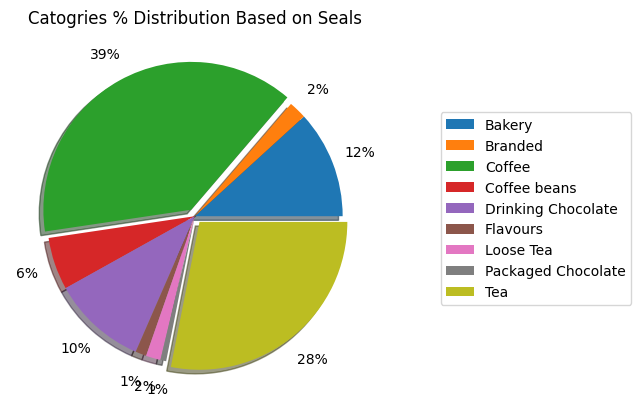

In [25]:
explode = [0, 0, 0.05, 0, 0,0,0,0,0.05]
plt.pie(x =df, labels = None,explode = explode,autopct='%.0f%%',pctdistance=1.2,shadow= True )
plt.legend( df.index, loc="upper right", bbox_to_anchor=(1.7, 0.8), fontsize=10)
#plt.legend(loc="upper right", bbox_to_anchor=(1.7, .8), fontsize=10)

plt.title("Catogries % Distribution Based on Seals")
plt.show()

In [26]:
data_f = data.groupby("Size")['product_id'].count()

In [27]:
data_f

Size
Large      44885
Ragular    45789
Small      13924
medium     44518
Name: product_id, dtype: int64

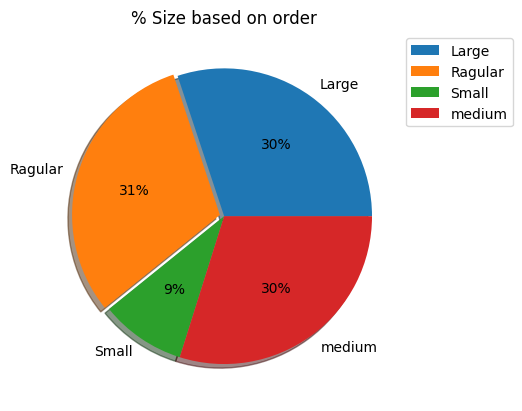

In [28]:
explode = [0,0.03,0,0]
plt.pie(x=data_f,labels = data_f.index,explode =explode,autopct = "%.0f%%",shadow =True)
plt.legend(loc="upper right",bbox_to_anchor =(1.3,1) )
plt.title("% Size based on order")
plt.show()

In [29]:
amount = data.groupby('store_location')["total_price"].sum()

In [30]:
sops = data.groupby("store_location")["product_id"].count()

In [31]:
sops

store_location
Astoria            50599
Hell's Kitchen     50735
Lower Manhattan    47782
Name: product_id, dtype: int64

In [32]:
amount

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: total_price, dtype: float64

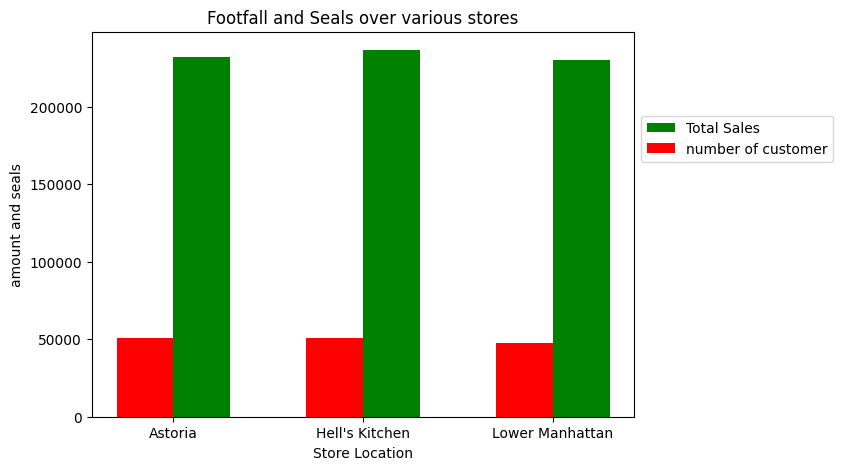

In [108]:
bar_width = 0.3
x = np.arange(len(amount.index))
plt.figure(figsize=(7, 5))
plt.bar(x + bar_width/2, amount.values, width=.3, label="Total Sales", color='green')
plt.bar(x - bar_width/2, sops.values,width =.3,label = "number of customer",color ='red')
plt.xticks(x, amount.index)
plt.title("Footfall and Seals over various stores")
plt.xlabel("Store Location")
plt.ylabel("amount and seals")
plt.legend(bbox_to_anchor= (1,0.8))

plt.show()

In [36]:
ddf = data.groupby("product_type")["total_price"].sum()

In [39]:
sort_ddf = ddf.sort_values(ascending =False)

In [42]:
p_type=sort_ddf.head(5)

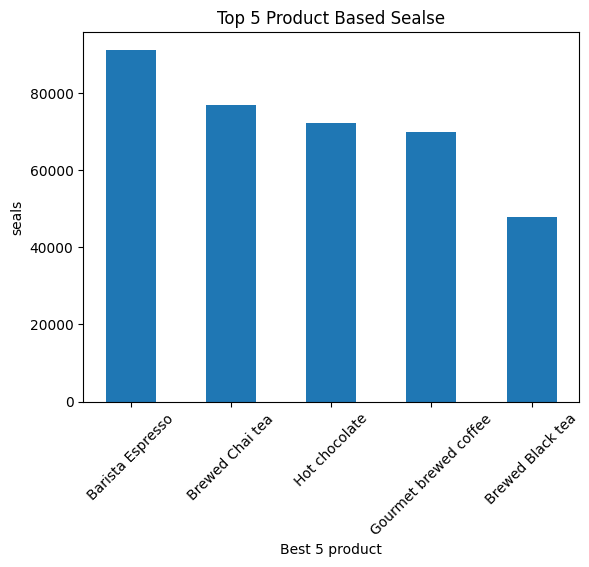

In [106]:
plt.bar(x=p_type.index,height =p_type.values,width = .5)
plt.xlabel("Best 5 product")
plt.ylabel("seals")
plt.title("Top 5 Product Based Sealse")
plt.xticks(rotation=45)
plt.show()

In [82]:
week = data.groupby("day")['total_price'].sum()

In [84]:
order = data.groupby("day")['product_id'].count()

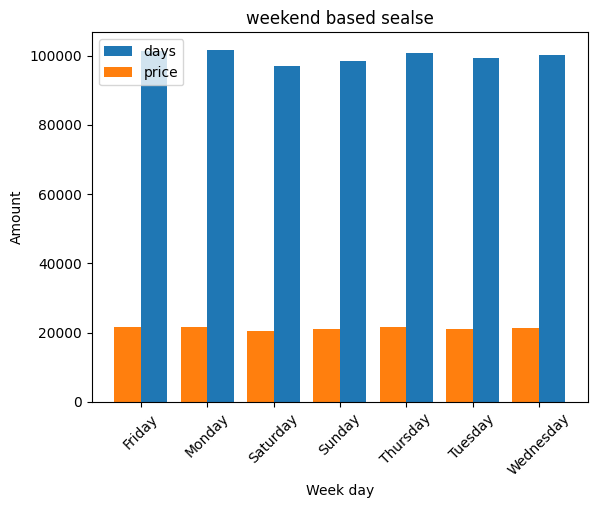

In [109]:
x = np.arange(len(week))
width_p=0.4
plt.bar(x+width_p/2,week.values,width =.4,label= "days")
plt.bar(x-width_p/2,order.values,width =0.4,label = "price")
plt.xticks(x, week.index, rotation=45) 
plt.xlabel("Week day")
plt.ylabel("Amount")
plt.title("weekend based sealse")
plt.legend()
plt.show()